# [The Elements of Statistical Learning in Julia](https://github.com/jcontesti/the-elements-of-statistical-learning-in-julia)

# 2.3 Two Simple Approaches: Least Squares and Nearest Neighbors

## Objectives

1. Understanding of the basics of Linear Models and Least Squares.
2. Complete a simple classification example using Least Squares and Nearest Neighbors.

## Source code

### Classification example with linear regression

In [1]:
include("../shared/GaussiansMixture.jl")

using LinearAlgebra, Plots, RData, Statistics

# Use PyPlot as a backend for Plots
pyplot();

training_palette = [:lightblue, :orange];

In [2]:
# Load Gaussian distributions mixture data
mixture = load("../../data/ESL.mixture.rda", convert=true)

# Load traininig data
X = mixture["ESL.mixture"]["x"]
Y = mixture["ESL.mixture"]["y"];

In [3]:
# Add a column with ones
X = hcat(ones(size(X, 1)), X);

In [4]:
# Compute β using the unique solution to the normal equation
β = (X' * X)^-1 * X' * Y  # (2.6)

3-element Array{Float64,1}:
  0.32906140217745844
 -0.022635999378620698
  0.24959834132864353

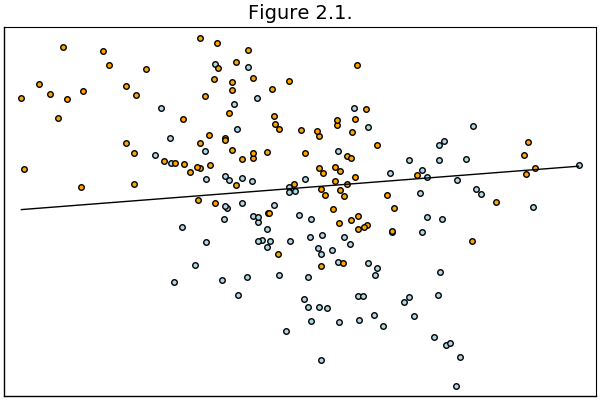

In [5]:
# Declare the function that will calculate the linear model
Ŷ(x1, x2) = β[1] + x1 * β[2] + x2 * β[3]

# And finally plot the results
plot_decision_boundary_on_scatter(X, Y, Ŷ, "Figure 2.1.")

### Classification example with Nearest Neighbors

In [6]:
using NearestNeighbors

In [7]:
# Get data and transpose it to get it ready for the NearestNeighbors package
data = mixture["ESL.mixture"]["x"]'

kdtree = KDTree(data);

In [8]:
# Declare the function that fits
Ŷ(x1, x2) = (1/k) * sum(Y[knn(kdtree, [x1, x2], k, true)[1]])  # (2.8)

Ŷ (generic function with 1 method)

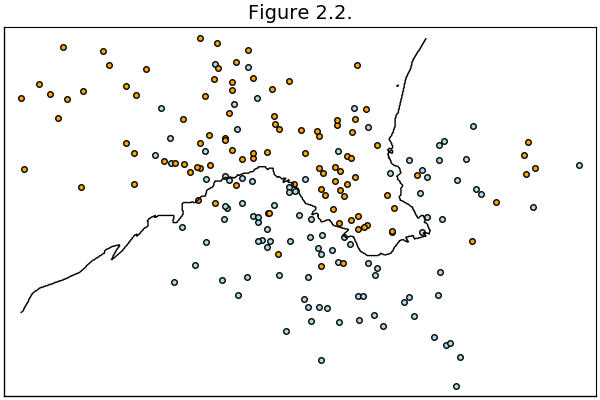

In [9]:
# Classification with 15-nearest-neighbors
k = 15
plot_decision_boundary_on_scatter(X, Y, Ŷ, "Figure 2.2.")

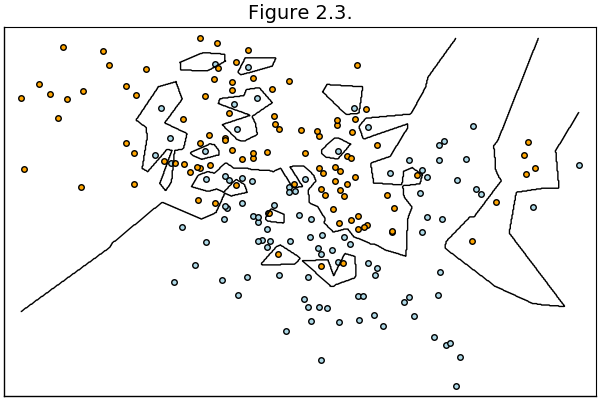

In [10]:
# Classification with only 1-nearest-neighbor
k = 1
plot_decision_boundary_on_scatter(X, Y, Ŷ, "Figure 2.3.")